In [56]:
library('tidyverse')
library('gapminder')
library('ggrepel')
library('patchwork')

Recreate this figure as best you can using the techniques we have learned:

![](02_example.png)

Work with the gapminder dataset. The following will give you four tables.
1. A table for 1952 data.
1. A table for 2002 data.
1. A table for just Kuwait in 1952. 
1. A table for just Kuwait in 2002. 

In [65]:
df.1952 = gapminder %>% filter(year == 1952)
df.2002 = gapminder %>% filter(year == 2002)
df.1952.kuwait = df.1952 %>% filter(country == 'Kuwait') 
df.2002.kuwait = df.2002 %>% filter(country == 'Kuwait') 

In [66]:
df.plot = gapminder %>% 
    filter(year %in% c('1952', '2002'))

In [67]:
options(repr.plot.width = 13.5, repr.plot.height = 6)

p = ggplot(df.plot, aes(x = gdpPercap, 
                        y = lifeExp)) + geom_point(aes(size = pop, color = continent), 
                                                         alpha = 0.75) 

p = p + scale_color_manual(breaks = c("Africa", 
                                      "Americas", 
                                      "Asia", 
                                      "Europe", 
                                      "Oceania"),
                           
                        values=c("#DF4747", 
                                 "#4060C7", 
                                 "#4CA965", 
                                 "#7560A6", 
                                 "#EF9356"))

p = p + facet_wrap(~year, ncol = 2) + theme(panel.spacing = unit(5, "lines"))

p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)

p = p + ylim(c(27, 82))

p = p + scale_x_log10()

p = p + theme(legend.position = 'right',
              legend.box.spacing = unit(2, "lines"),
              legend.title = element_text(size = 20),
              legend.text = element_text(size = 17),
              axis.text.x = element_text(size = 15),
              axis.text.y = element_text(size = 15),
              strip.text.x = element_blank(),
              axis.title.x = element_text(size = 22),
              axis.title.y = element_text(size = 22),
              strip.background = element_blank())

p = p + labs(y = "Life expectancy, years",
             x = "GDP per capita", 
             color = "Continent", 
             size= "Population size")

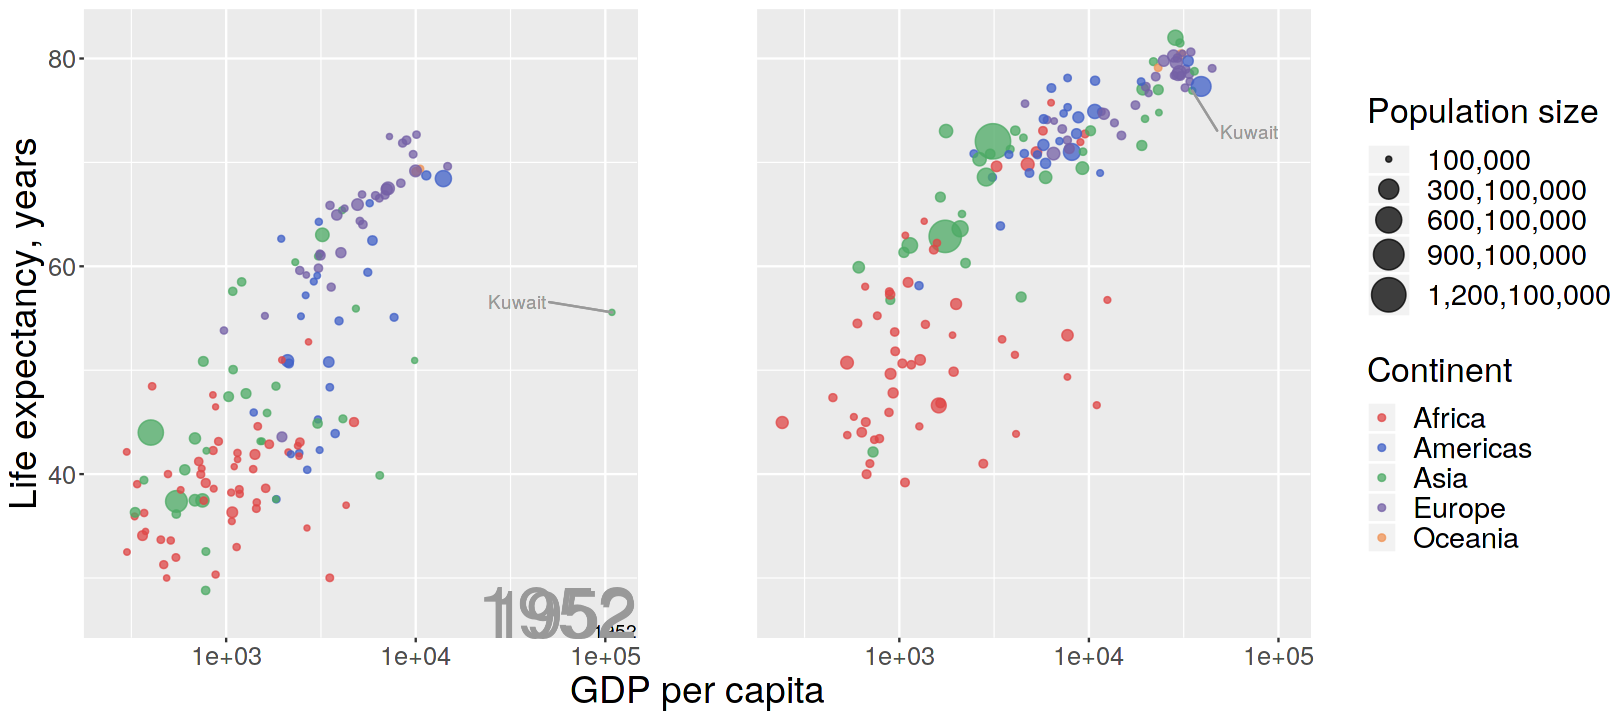

In [75]:
p = p + geom_text_repel(
    data = df.1952.kuwait,
    nudge_x = -0.5,
    nudge_y = 1,
    mapping = aes(x = gdpPercap, y = lifeExp, label = "Kuwait"),
    color = 'gray60')

p = p + geom_text_repel(
    data = df.2002.kuwait,
    nudge_x = 0.3,
    nudge_y = -4,
    mapping = aes(x = gdpPercap, y = lifeExp, label = "Kuwait"),
    color = 'gray60')

p

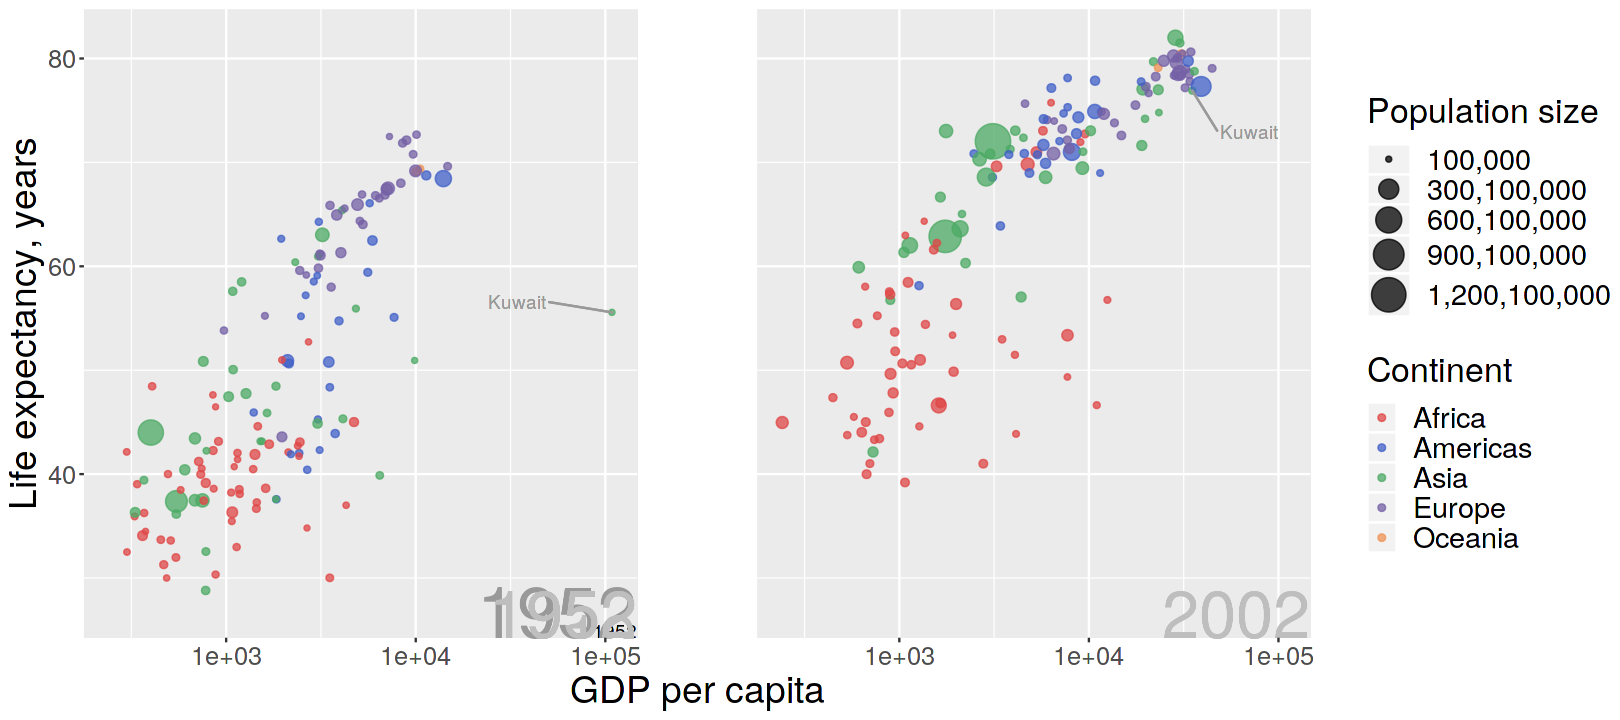

In [78]:
p = p + geom_text(data = df.1952.kuwait, aes(label = "1952"),
                  color = 'gray',
                  size = 14,
                  x = Inf, y = -Inf) 

p = p + geom_text(data = df.2002.kuwait, aes(label = "2002"),
                  color = 'gray',
                  size = 14,
                  x = Inf, y = -Inf, hjust = 1, vjust = 0)                     
p

## Hints!

These snippets will help you to get the legends and scales as they're set in the example.

- This is how the size scale is set:

```R
p = p + scale_size(breaks = seq(1e+5, 1.5e+9, 3e+8), 
                   limits = c(1e+4, 1.5e+9),
                   range = c(1, 10), labels = scales::comma)
```  

- This is how the `y-axis` is fixed for each plot:

```R
p = p + ylim(c(27, 82))
```

- This will set the `x-axis` to a log-scale:

```R
p = p + scale_x_log10()
```

- The `annotate` function is useful for adding text to a figure that's not mapped to data. [annotate documentation](https://ggplot2.tidyverse.org/reference/annotate.html). 

- Don't forget about third-party packages like `ggrepel` and `patchwork`!